In [5]:
#Завантажуємо файл Most Streamed Spotify Songs 2023
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("spotify-2023.csv", encoding="cp1251")

print(data.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [17]:
#Виводимо усі пропуски у стовпцях
missing_points = data.isnull().sum()
print("Загальна кількість пропусків у кожному стовпці:")
print(missing_points)

#Визначаємо розмір даних (кількість стовпців та рядків)
num_rows, num_colomns = data.shape
print("Розмір датасету: {} рядків і {} стовпців" .format(num_rows, num_colomns))

Загальна кількість пропусків у кожному стовпці:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
Розмір датасету: 953 рядків і 24 стовпців


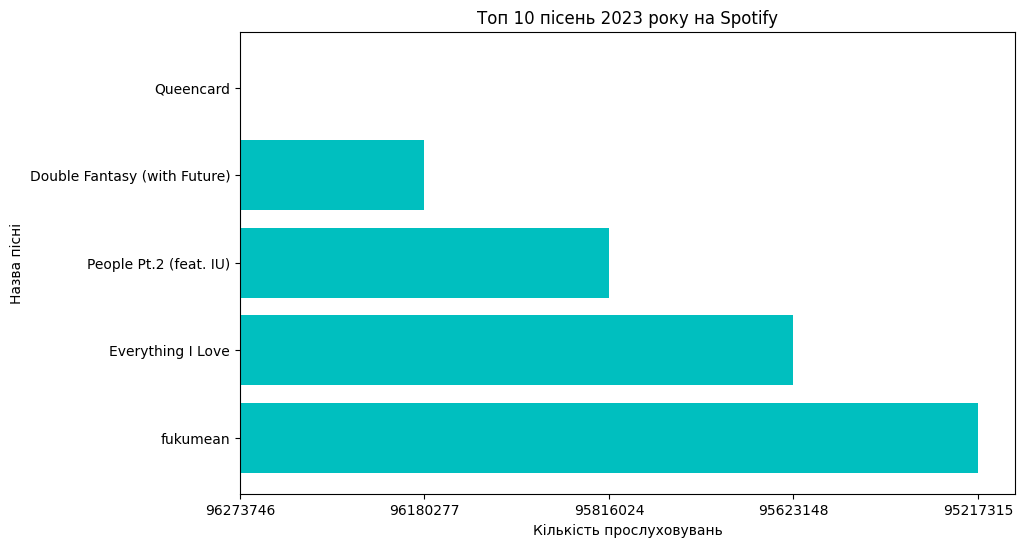

In [19]:
#Виділемо пісні 2023 року
songs_2023 = data[data["released_year"] == 2023]

#Відсортовуємо топ 5 пісень 2023 року за кількістю прослуховувань
top_10_songs = songs_2023.sort_values(by="streams",ascending=False).head(5)

#Будуємо діаграму
plt.figure(figsize=(10, 6))
plt.barh(top_10_songs["track_name"], top_10_songs["streams"], color='c')
plt.xlabel("Кількість прослуховувань")
plt.ylabel("Назва пісні")
plt.title("Топ 10 пісень 2023 року на Spotify")
plt.gca().invert_yaxis()
plt.show()

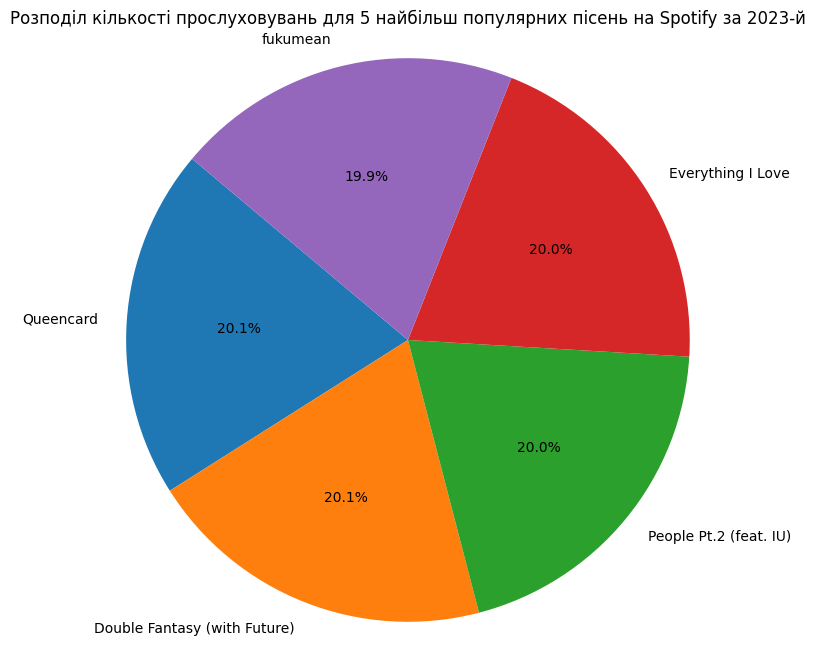

In [25]:
#Кругова діаграма з 5 найбільш популярними піснями
top_songs = songs_2023.sort_values(by ="streams", ascending=False).head(5)

plt.figure(figsize=(8,8))
plt.pie(top_songs["streams"], labels=top_songs["track_name"], autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("Розподіл кількості прослуховувань для 5 найбільш популярних пісень на Spotify за 2023-й")
plt.show()

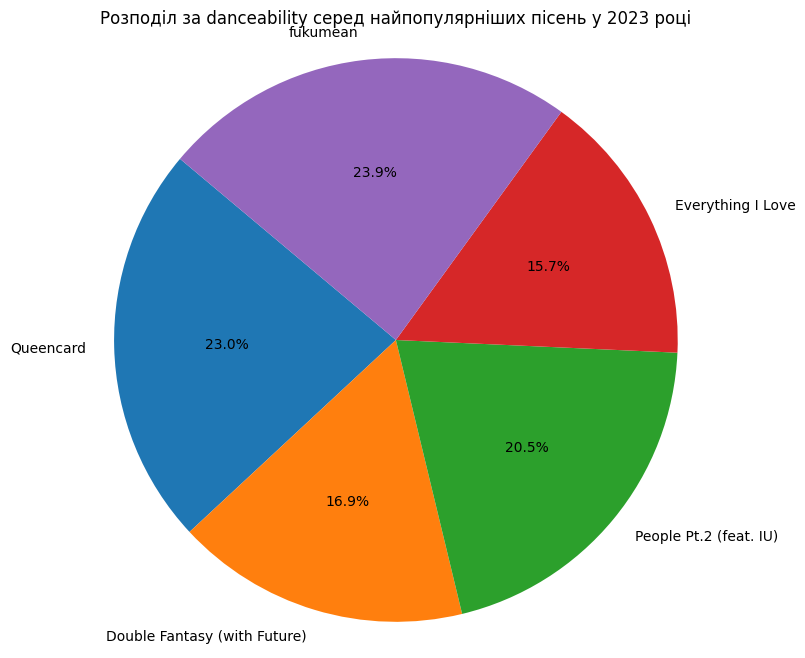

In [21]:
#розподіл за danceability серед найпопулярніших пісень у 2023 році.
total_danceability = top_songs["danceability_%"].astype(float).sum()
top_songs["danceability_percentage"] = top_songs["danceability_%"].astype(float) / total_danceability * 100

# Створення кругової діаграми
plt.figure(figsize=(8,8))
plt.pie(top_songs["danceability_percentage"], labels=top_songs["track_name"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Розподіл за danceability серед найпопулярніших пісень у 2023 році")
plt.show()

In [26]:
# Виділяємо необхідні стовпчики
selected_columns = ['track_name', 'streams', 'released_month']
songs_selected = songs_2023[selected_columns]

# Змінюємо тип даних стовпця 'streams' на float
songs_selected['streams'] = songs_selected['streams'].astype(float)

# Виводимо перші 5 рядків нового сету даних та їхні типи
print(songs_selected.head())
print(songs_selected.dtypes)

                            track_name      streams  released_month
0  Seven (feat. Latto) (Explicit Ver.)  141381703.0               7
1                                 LALA  133716286.0               3
2                              vampire  140003974.0               6
4                       WHERE SHE GOES  303236322.0               5
5                             Sprinter  183706234.0               6
track_name         object
streams           float64
released_month      int64
dtype: object


<ipython-input-26-4fa59159ba71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_selected['streams'] = songs_selected['streams'].astype(float)


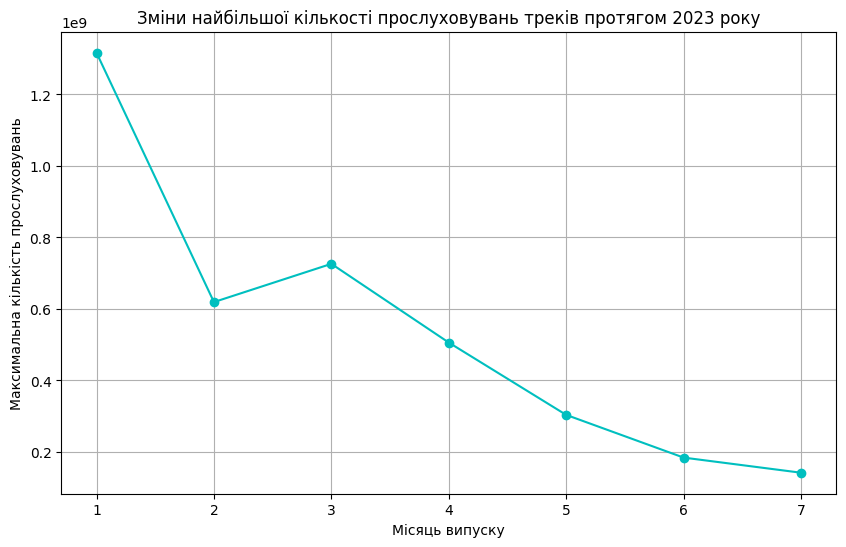

In [28]:
# Знаходимо трек з максимальними показниками для кожного місяця
max_streams_per_month = songs_selected.groupby('released_month').apply(lambda x: x.loc[x.streams.idxmax()])
max_streams_per_month.reset_index(drop=True, inplace=True)

# Побудуємо графік даних
plt.figure(figsize=(10, 6))
plt.plot(max_streams_per_month['released_month'], max_streams_per_month['streams'], marker='o', linestyle='-', color='c')
plt.xlabel('Місяць випуску')
plt.ylabel('Максимальна кількість прослуховувань')
plt.title('Зміни найбільшої кількості прослуховувань треків протягом 2023 року')
plt.grid(True)
plt.show()


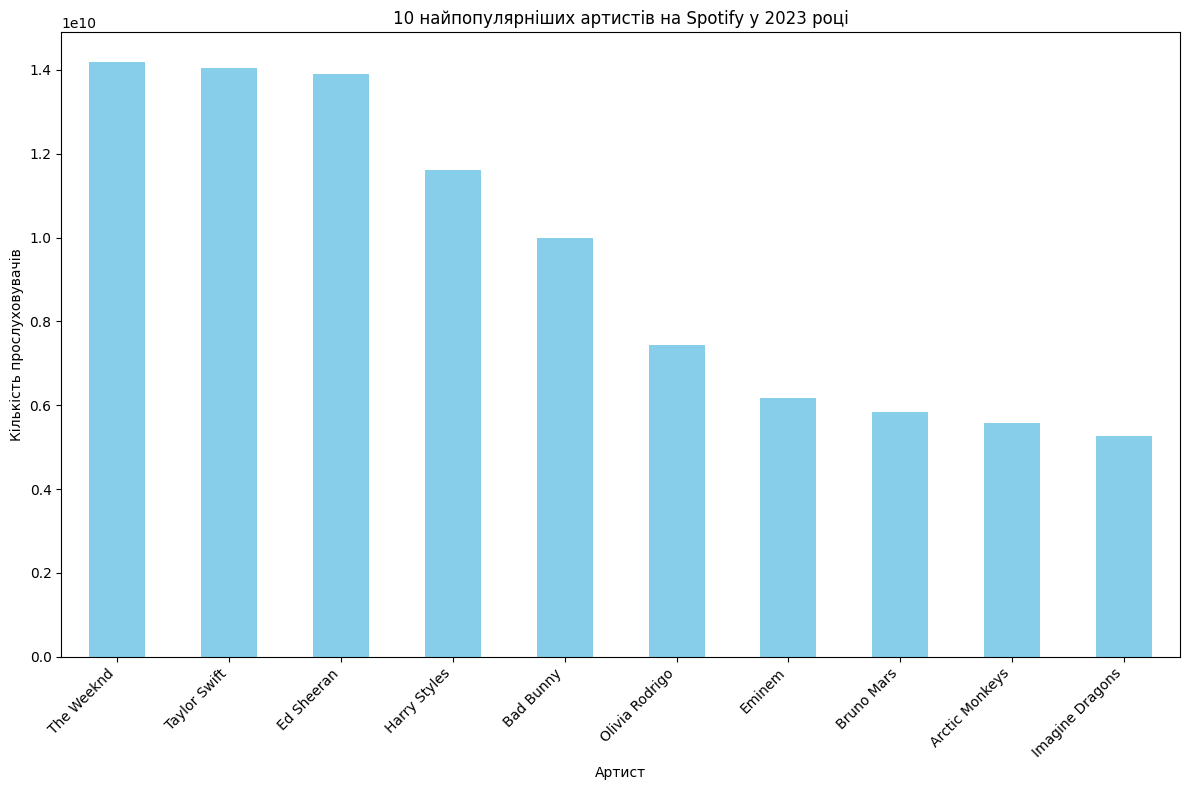

In [39]:
#відображення 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Вибір 10 найбільших значень за кількістю прослуховувачів
top_10_artists = data.groupby('artist(s)_name')['streams'].sum().nlargest(10)

# Побудова стовпчикової діаграми
plt.figure(figsize=(12, 8))
top_10_artists.plot(kind='bar', color='skyblue')
plt.title('10 найпопулярніших артистів на Spotify у 2023 році')
plt.xlabel('Артист')
plt.ylabel('Кількість прослуховувачів')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


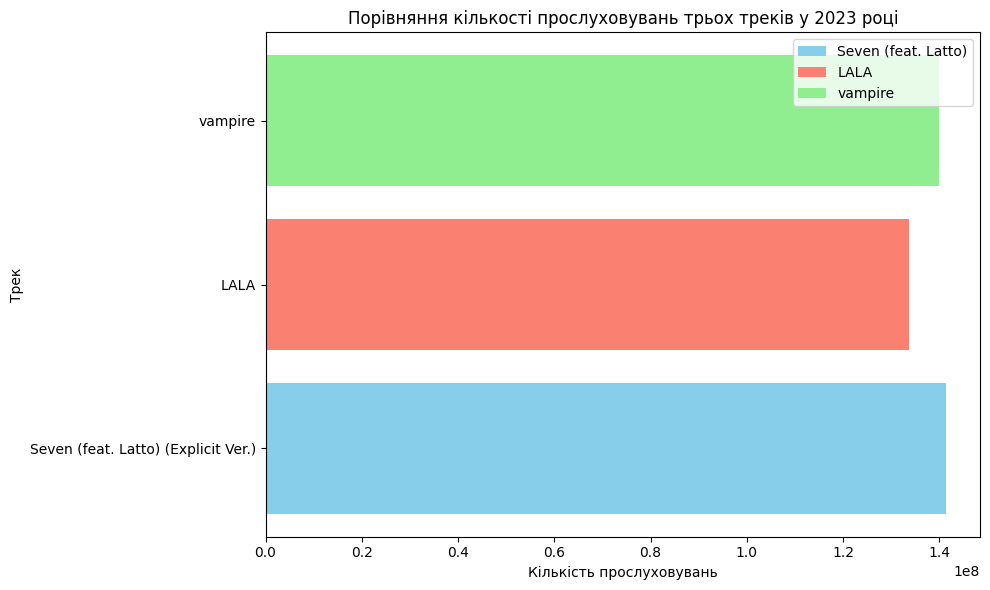

In [ ]:
#Порівняння кількість прослуховувань трьох конкретних треків у 2023 році.

data_2023 = df[df['released_year'] == 2023]

# Вибір трьох конкретних треків
track1 = data_2023[data_2023['track_name'] == 'Seven (feat. Latto) (Explicit Ver.)']
track2 = data_2023[data_2023['track_name'] == 'LALA']
track3 = data_2023[data_2023['track_name'] == 'vampire']

# Побудова горизонтальної стовпчикової діаграми
plt.figure(figsize=(10, 6))
plt.barh(track1['track_name'], track1['streams'], color='skyblue', label='Seven (feat. Latto)')
plt.barh(track2['track_name'], track2['streams'], color='salmon', label='LALA')
plt.barh(track3['track_name'], track3['streams'], color='lightgreen', label='vampire')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Трек')
plt.title('Порівняння кількості прослуховувань трьох треків у 2023 році')
plt.legend()
plt.tight_layout()
plt.show()